<a href="https://colab.research.google.com/github/alinayawar/deep/blob/main/birds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.13G/1.14G [00:07<00:00, 180MB/s]
100% 1.14G/1.14G [00:07<00:00, 157MB/s]


In [5]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/TURKEY VULTURE/144.jpg  
  inflating: train/TURKEY VULTURE/145.jpg  
  inflating: train/TURKEY VULTURE/146.jpg  
  inflating: train/TURKEY VULTURE/147.jpg  
  inflating: train/TURKEY VULTURE/148.jpg  
  inflating: train/TURKEY VULTURE/149.jpg  
  inflating: train/TURKEY VULTURE/150.jpg  
  inflating: train/TURKEY VULTURE/151.jpg  
  inflating: train/TURQUOISE MOTMOT/001.jpg  
  inflating: train/TURQUOISE MOTMOT/002.jpg  
  inflating: train/TURQUOISE MOTMOT/003.jpg  
  inflating: train/TURQUOISE MOTMOT/004.jpg  
  inflating: train/TURQUOISE MOTMOT/005.jpg  
  inflating: train/TURQUOISE MOTMOT/006.jpg  
  inflating: train/TURQUOISE MOTMOT/007.jpg  
  inflating: train/TURQUOISE MOTMOT/008.jpg  
  inflating: train/TURQUOISE MOTMOT/009.jpg  
  inflating: train/TURQUOISE MOTMOT/010.jpg  
  inflating: train/TURQUOISE MOTMOT/011.jpg  
  inflating: train/TURQUOISE MOTMOT/012.jpg  
  inflating: train/TURQUOISE MOTMOT/013.jpg  

In [41]:
import os, shutil
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

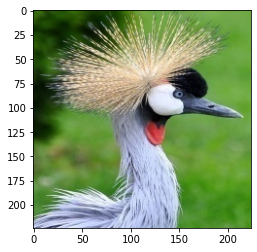

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/test/AFRICAN CROWNED CRANE/4.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [44]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

<dtype: 'float32'>
32
600
600


In [7]:
train_dir = "./train"
test_dir = "./test"
val_dir = "./valid"

In [8]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode='categorical',
                                                                 image_size=(600,600), batch_size=32)

test_data =  tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode='categorical',
                                                                 image_size=(600,600), batch_size=32)

val_data =  tf.keras.preprocessing.image_dataset_from_directory(val_dir, label_mode='categorical',
                                                                image_size=(600,600), batch_size=32)

Found 45980 files belonging to 315 classes.
Found 1575 files belonging to 315 classes.
Found 1575 files belonging to 315 classes.


In [9]:
len(os.listdir(train_dir))

315

In [10]:
len(train_data.class_names)

315

In [11]:
labels_names = train_data.class_names

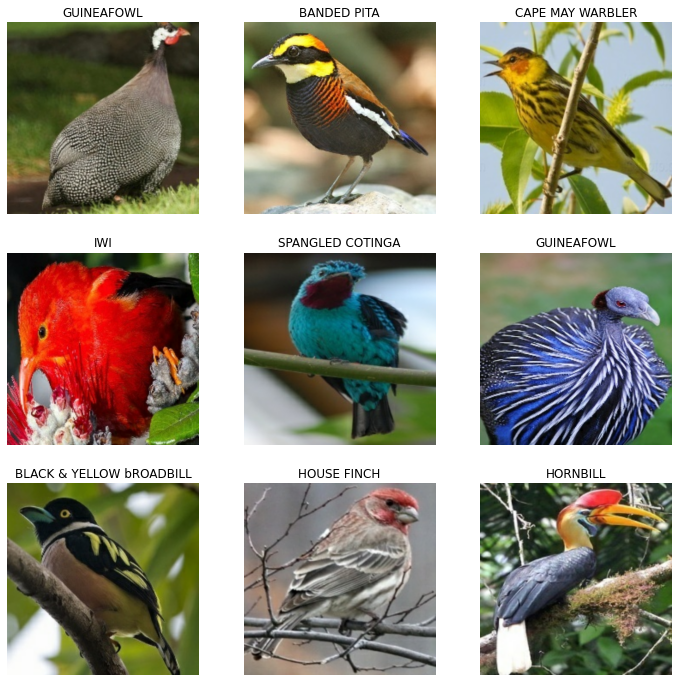

In [12]:
plt.figure(figsize=(12,12))
for image, label in train_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(labels_names[tf.argmax(label[i])])
        plt.axis("off")

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(315, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [15]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='categorical')

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


In [17]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 18s 79ms/step - loss: 5.7518 - acc: 0.0055 - val_loss: 5.7483 - val_acc: 0.0030
Epoch 2/30
100/100 [==============================] - 8s 76ms/step - loss: 5.7278 - acc: 0.0065 - val_loss: 5.6954 - val_acc: 0.0080
Epoch 3/30
100/100 [==============================] - 8s 76ms/step - loss: 5.6409 - acc: 0.0145 - val_loss: 5.5894 - val_acc: 0.0110
Epoch 4/30
100/100 [==============================] - 8s 82ms/step - loss: 5.5307 - acc: 0.0180 - val_loss: 5.4707 - val_acc: 0.0120
Epoch 5/30
100/100 [==============================] - 8s 82ms/step - loss: 5.4337 - acc: 0.0250 - val_loss: 5.3858 - val_acc: 0.0270
Epoch 6/30
100/100 [==============================] - 8s 75ms/step - loss: 5.3258 - acc: 0.0275 - val_loss: 5.1957 - val_acc: 0.0420
Epoch 7/30
100/100 [==============================] - 8s 75ms/step - loss: 5.1687 - acc: 0.0420 - val_loss: 5.0876 - val_acc: 0.0520
Epoch 8/30
100/100 [==============================] - 8s 82ms/step -

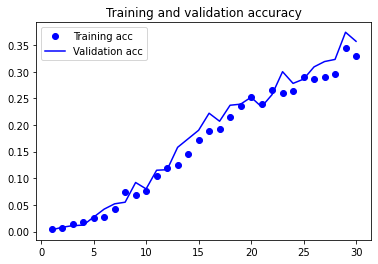

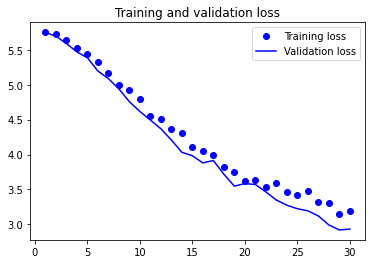

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
model.save('cats_and_dogs_small_1.h5')

In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
  1/100 [..............................] - ETA: 9s - loss: 3.1618 - acc: 0.3000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 8s 77ms/step - loss: 3.1867 - acc: 0.3125 - val_loss: 2.8753 - val_acc: 0.3960
Epoch 2/100
100/100 [==============================] - 8s 82ms/step - loss: 3.0132 - acc: 0.3645 - val_loss: 2.9572 - val_acc: 0.3440
Epoch 3/100
100/100 [==============================] - 8s 76ms/step - loss: 2.9314 - acc: 0.3670 - val_loss: 2.9463 - val_acc: 0.3510
Epoch 4/100
100/100 [==============================] - 8s 82ms/step - loss: 2.9047 - acc: 0.3690 - val_loss: 2.8573 - val_acc: 0.3700
Epoch 5/100
100/100 [==============================] - 8s 82ms/step - loss: 2.9603 - acc: 0.3560 - val_loss: 2.7733 - val_acc: 0.3790
Epoch 6/100
100/100 [==============================] - 8s 75ms/step - loss: 2.8467 - acc: 0.3790 - val_loss: 2.6892 - val_acc: 0.3900
Epoch 7/100
100/100 [==============================] - 8s 76ms/step - loss: 2.8644 - acc: 0.3955 - val_loss: 2.7050 - val_acc: 0.3850
Epoch 8/100
100/100 [==============================] - 8s 76ms/step - loss

In [22]:
model.save('cats_and_dogs_small_2.h5')

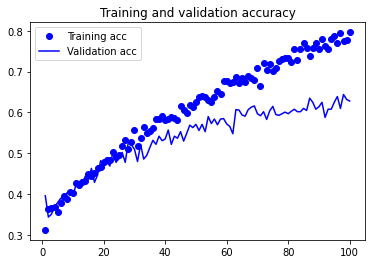

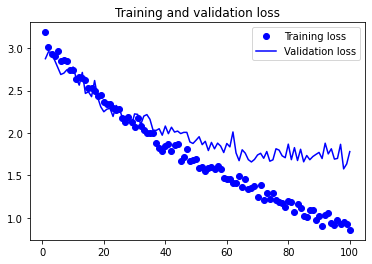

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()